https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score, classification_report
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import preprocessing


In [2]:
data = pd.read_csv("insurance.csv")  

In [3]:
data.shape

(1338, 7)

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [9]:
data = pd.get_dummies(data=data,columns=['sex','smoker','region'],drop_first=True)

In [10]:
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


<AxesSubplot: ylabel='age'>

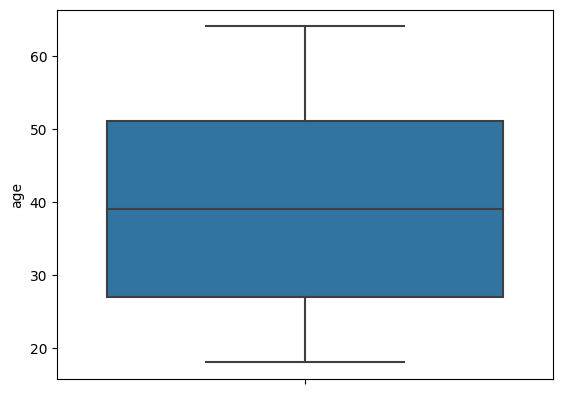

In [11]:
sns.boxplot(data,y='age')

<AxesSubplot: ylabel='bmi'>

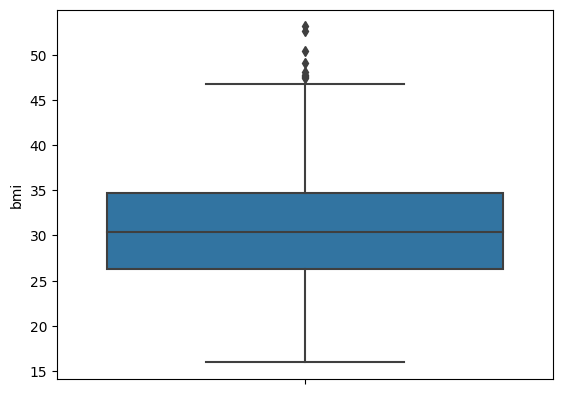

In [12]:
sns.boxplot(data,y='bmi')

In [13]:
len(data[data['bmi']>45])

20

In [14]:
idx=data[data['bmi']>45].index

In [15]:
data.drop(idx,inplace=True)

<AxesSubplot: >

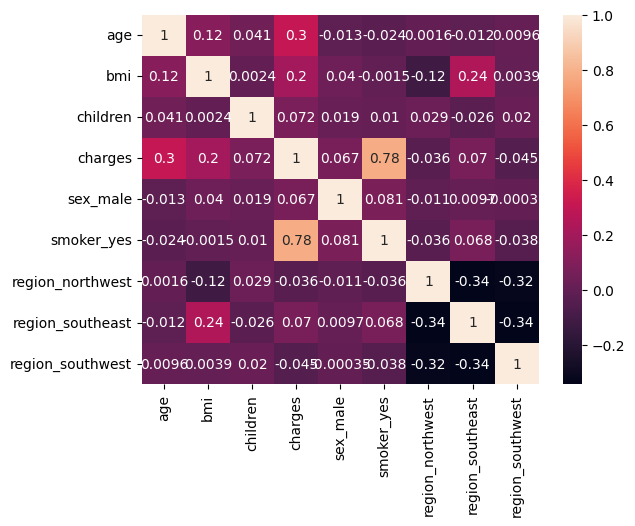

In [16]:
sns.heatmap(data.corr(),annot=True)

In [17]:
X = data.drop('charges', axis=1)
y = data['charges']

In [18]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [19]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1317, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
262,52,24.320,3,1,1,0,0,0
1007,47,28.215,3,1,1,1,0,0
563,50,44.770,1,1,0,0,1,0
49,36,35.200,1,1,1,0,1,0
871,26,29.480,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
538,46,28.050,1,0,0,0,1,0
140,34,22.420,2,1,0,0,0,0
1297,28,26.510,2,0,0,0,1,0
1206,59,34.800,2,0,0,0,0,1


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_test)

In [24]:
print(f'The Mean Square Error(MSE) is: ',mean_squared_error(y_test, pred))
print(f'The r2score is: ',r2_score(y_test, pred))

r2=r2_score(y_test, pred)

num_independent_vars = 8  

# Adjusted R-squared calculation
n = len(y_test)
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - num_independent_vars - 1)

print(f'The Adjusted R-squared score is: {adjusted_r2}')

The Mean Square Error(MSE) is:  35789779.82067265
The r2score is:  0.7524077089362
The Adjusted R-squared score is: 0.7472895220408243


# Trying to see which all variables are significant for perdiction

In [25]:
X_train_scaled = sm.add_constant(X_train_scaled)

model_2 = sm.OLS(y_train, X_train_scaled).fit()

# Print the summary report
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     337.3
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          2.21e-266
Time:                        16:42:32   Log-Likelihood:                -9319.8
No. Observations:                 921   AIC:                         1.866e+04
Df Residuals:                     912   BIC:                         1.870e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.323e+04    198.841     66.544      0.0

# model with no insignificant variables

In [34]:
x=X[['age','bmi','smoker_yes']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [36]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [37]:
x_train_scaled = sm.add_constant(x_train_scaled)

model_3 = sm.OLS(y_train, x_train_scaled).fit()

# Print the summary report
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     886.8
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          1.80e-270
Time:                        16:48:22   Log-Likelihood:                -9326.6
No. Observations:                 921   AIC:                         1.866e+04
Df Residuals:                     917   BIC:                         1.868e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.323e+04    199.753     66.240      0.0